### Advertising Sales Channel Prediction
Problem Statement:
Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score
import pickle as pkl

### Data Collection

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
display(df)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [3]:
df = df.drop(['Unnamed: 0'],axis=1)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 4)

In [5]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<AxesSubplot:>

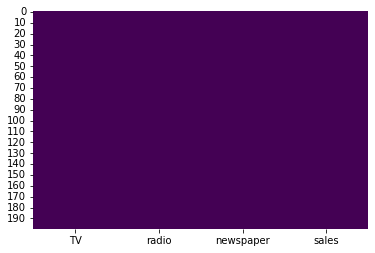

In [7]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [11]:
cat = ['TV', 'radio', 'newspaper']

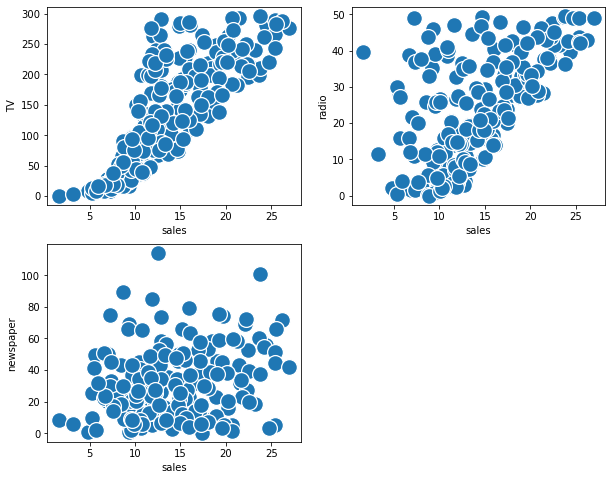

In [25]:
count=1
plt.subplots(figsize=(10, 8))
for i in cat:
    plt.subplot(2,2,count)
    sns.scatterplot(y=df[i],x=df['sales'],s=250)
    count+=1

plt.show()

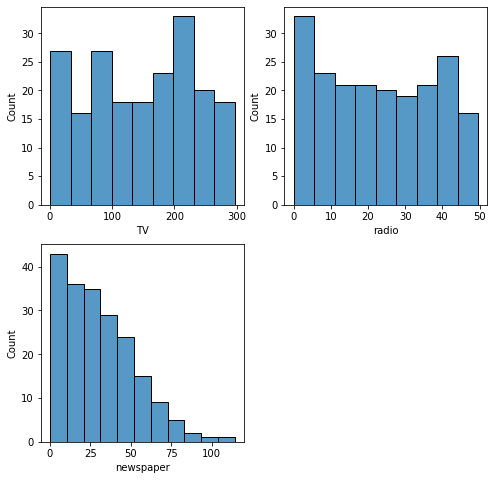

In [32]:
count=1
plt.subplots(figsize=(8, 8))
for i in cat:
    plt.subplot(2,2,count)
    sns.histplot(x=df[i])
    count+=1

plt.show()

In [33]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

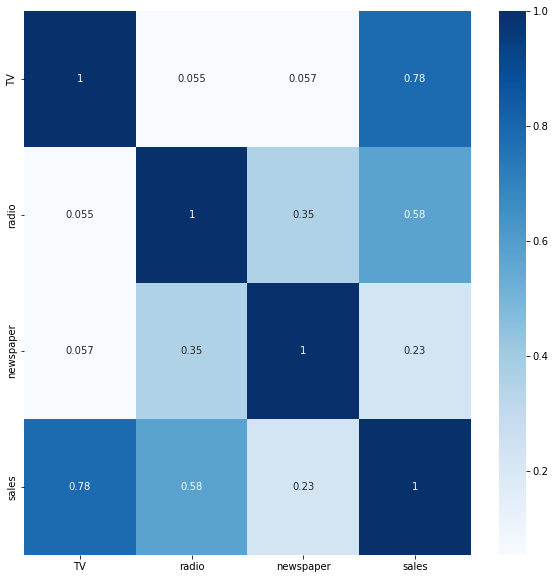

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

In [35]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [36]:
for i in cat :
    if df.skew().loc[i]>0.60:
        df[i] = np.log1p(df[i])

In [37]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper   -0.799875
sales        0.407571
dtype: float64

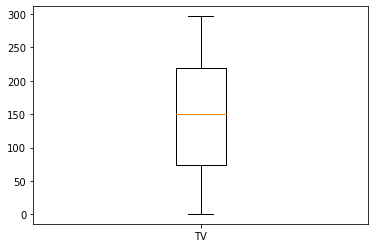

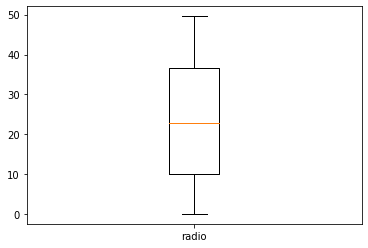

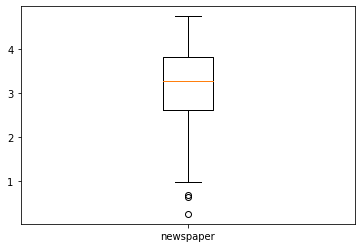

In [38]:
for i in cat:
    plt.boxplot(df[i], labels = [i])
    plt.show()

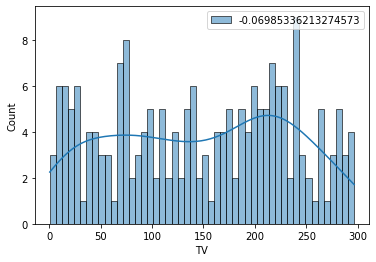

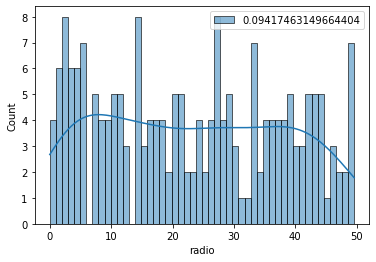

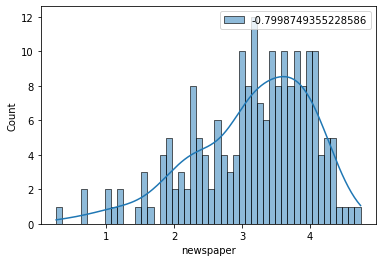

In [39]:
for i in cat:
    sns.histplot(df[i], kde = True, bins = 50, label = df[i].skew())
    plt.legend(loc = 'upper right')
    plt.show()

In [40]:
for i in cat:
    Q1,Q3 = np.percentile(df[i] , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    df_no_outliers = df[(df[i] < lower_range) | (df[i] > upper_range)]

In [41]:
df_no_outliers

,TV,radio,newspaper,sales
8,8.6,2.1,0.693147,4.8
33,265.6,20.0,0.262364,17.4
65,69.0,9.3,0.641854,9.3


In [42]:
z = np.abs(zscore(df))
threshold = 3
print(np.where(z<3))
print(df.shape)

(array([  0,   0,   0,   0,   1,   1,   1,   1,   2,   2,   2,   2,   3,
         3,   3,   3,   4,   4,   4,   4,   5,   5,   5,   5,   6,   6,
         6,   6,   7,   7,   7,   7,   8,   8,   8,   8,   9,   9,   9,
         9,  10,  10,  10,  10,  11,  11,  11,  11,  12,  12,  12,  12,
        13,  13,  13,  13,  14,  14,  14,  14,  15,  15,  15,  15,  16,
        16,  16,  16,  17,  17,  17,  17,  18,  18,  18,  18,  19,  19,
        19,  19,  20,  20,  20,  20,  21,  21,  21,  21,  22,  22,  22,
        22,  23,  23,  23,  23,  24,  24,  24,  24,  25,  25,  25,  25,
        26,  26,  26,  26,  27,  27,  27,  27,  28,  28,  28,  28,  29,
        29,  29,  29,  30,  30,  30,  30,  31,  31,  31,  31,  32,  32,
        32,  32,  33,  33,  33,  34,  34,  34,  34,  35,  35,  35,  35,
        36,  36,  36,  36,  37,  37,  37,  37,  38,  38,  38,  38,  39,
        39,  39,  39,  40,  40,  40,  40,  41,  41,  41,  41,  42,  42,
        42,  42,  43,  43,  43,  43,  44,  44,  44,  44,  45,  

In [43]:
df_new = df[(z<3).all(axis = 1)]
df_new.shape

(199, 4)

In [44]:
df.shape

(200, 4)

In [45]:
X = df_new.drop(['sales'],axis=1)
y = df_new['sales']

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
for i in X.columns:
    scaler = StandardScaler()
    X[i] = scaler.fit_transform(X[i].values.reshape(-1, 1))

In [48]:
reg_model = [LinearRegression(),GradientBoostingRegressor(),AdaBoostRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),ExtraTreesRegressor(),RandomForestRegressor()]
max_r2_score = 0
for r_state in range(42,95):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = r_state,test_size = 0.33)
    for i in reg_model:
        i.fit(X_train,y_train)
        pred = i.predict(X_test)
        r2_scores = r2_score(y_test,pred)
        print("R2 score for the random state is" ,r_state ,"is", r2_scores)
        if r2_scores > max_r2_score:
            max_r2_score = r2_scores
            final_state = r_state
            final_model = i
print()
print()
print()
print()
print("Maximum R2 score in the random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)

R2 score for the random state is 42 is 0.8776272284188226
R2 score for the random state is 42 is 0.9811189701608162
R2 score for the random state is 42 is 0.960094009472359
R2 score for the random state is 42 is 0.9338261611268888
R2 score for the random state is 42 is 0.9014062477163983
R2 score for the random state is 42 is 0.9905161949996003
R2 score for the random state is 42 is 0.9746526244432675
R2 score for the random state is 43 is 0.8698983384274159
R2 score for the random state is 43 is 0.9727701828231333
R2 score for the random state is 43 is 0.9528384314520508
R2 score for the random state is 43 is 0.8860355040198512
R2 score for the random state is 43 is 0.9124549195217818
R2 score for the random state is 43 is 0.9833913034225995
R2 score for the random state is 43 is 0.9703585075155742
R2 score for the random state is 44 is 0.8888033842685273
R2 score for the random state is 44 is 0.9749509876650595
R2 score for the random state is 44 is 0.9557319714372776
R2 score for th

In [49]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]

In [50]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              }
print(param_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8]}


In [51]:
ETR=ExtraTreesRegressor()
RandomizedSearch_ETR=RandomizedSearchCV(estimator=ETR,param_distributions=param_grid,n_iter=100,cv=3,verbose=2,
                               random_state=90,n_jobs=-1)
RandomizedSearch_ETR.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=ExtraTreesRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=90, verbose=2)

In [52]:
RandomizedSearch_ETR.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 450}

In [53]:
RandomizedSearch_ETR.best_estimator_

ExtraTreesRegressor(max_depth=450, max_features='auto', n_estimators=1000)

In [54]:
ETR = ExtraTreesRegressor(n_estimators=1000,min_samples_split=2,min_samples_leaf=1,max_features='auto',max_depth=450,random_state=90)
ETR.fit(X_train,y_train)
pred = ETR.predict(X_test)
r2_scores = r2_score(y_test,pred)
print("R2 Score :",r2_scores*100)

R2 Score : 99.29700613861893


In [55]:
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred))
print('Mean squared Error: ', mean_squared_error(y_test,pred))
print('Root Mean Absolute Error: ', np.sqrt(mean_absolute_error(y_test,pred)))

Mean Absolute Error:  0.3300348484848462
Mean squared Error:  0.18720739439392647
Root Mean Absolute Error:  0.574486595565855


Text(0, 0.5, 'Predicted_Y')

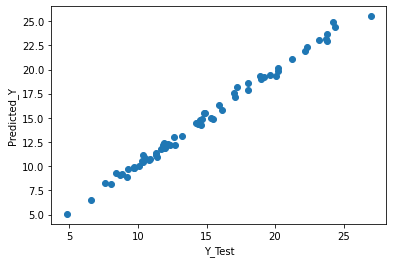

In [56]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y_Test')
plt.ylabel('Predicted_Y')

<AxesSubplot:>

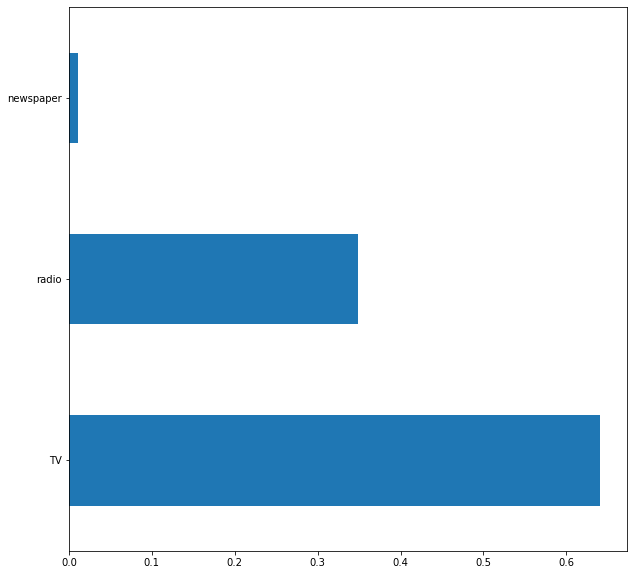

In [57]:
plt.figure(figsize=(10,10))
feat_importances = pd.Series(ETR.feature_importances_, index=X_train.columns)
feat_importances.nlargest(70).plot(kind='barh')

In [58]:
from sklearn.pipeline import Pipeline,make_pipeline
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=3)),
                     ('lr_regressor',LinearRegression())])

In [59]:
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=3)),
                     ('rf_regressor',RandomForestRegressor())])

In [60]:
pipeline_etr=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=3)),
                     ('rf_regressor',ExtraTreesRegressor())])

In [61]:
pipelines = [pipeline_lr, pipeline_dt,pipeline_etr]

In [62]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [63]:
pipe_dict = {0: 'Linear Regression',1:'RandomForest',2:'ExtraTreesRegressor'}

for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [64]:
pred = pipe.predict(X_test)
r2_scores = r2_score(y_test,pred)
print("R2 Score :",r2_scores*100)

R2 Score : 96.7231802090959
